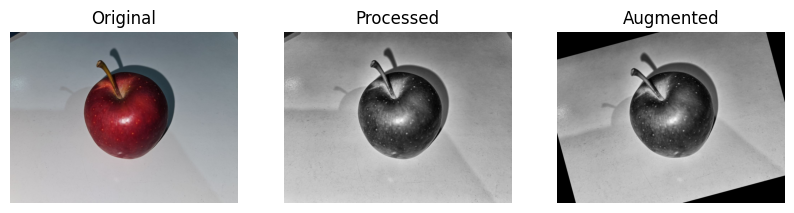

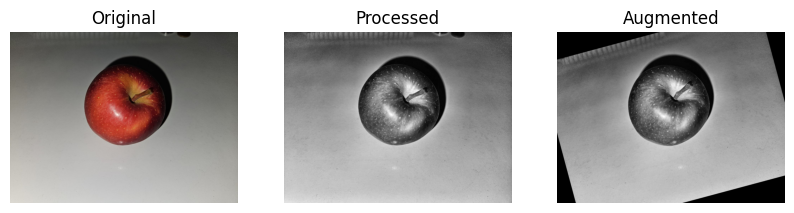

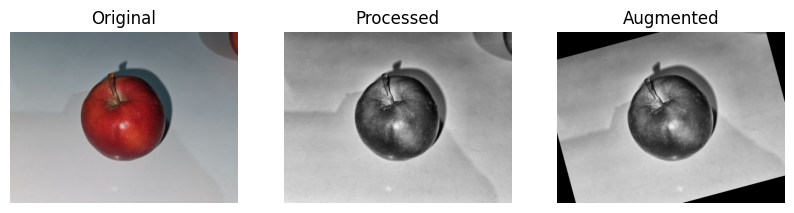

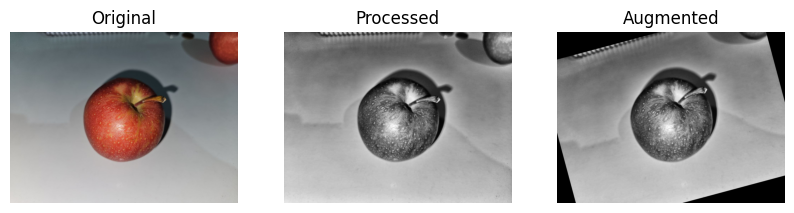

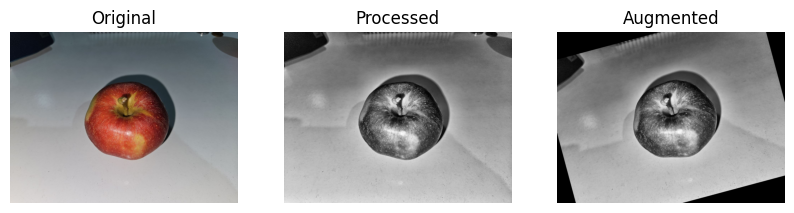

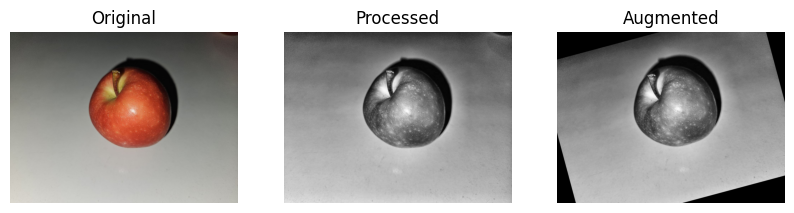

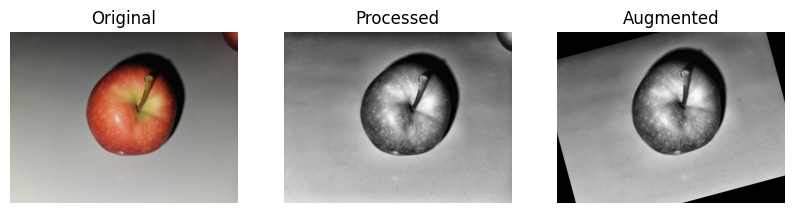

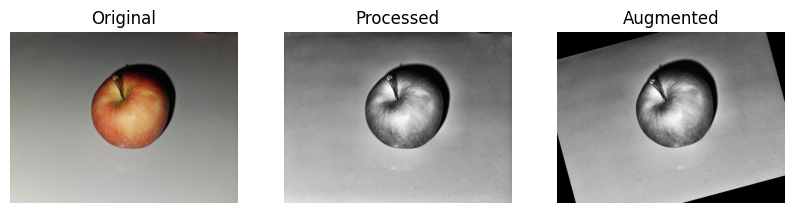

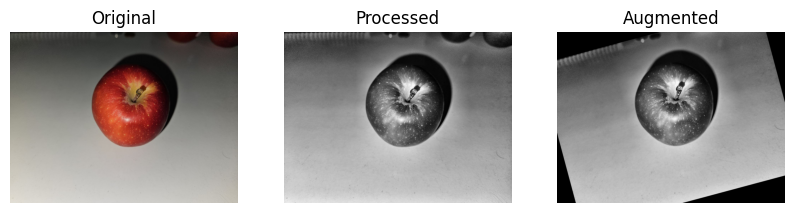

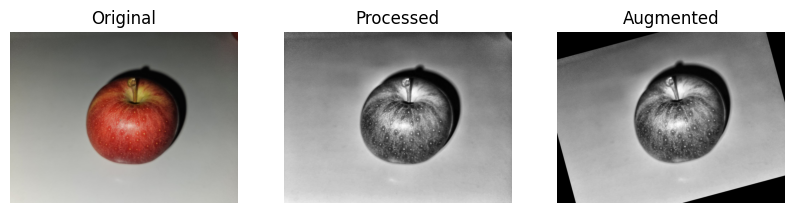

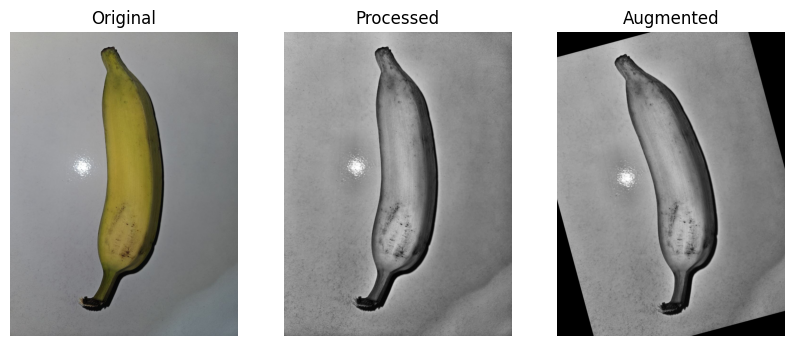

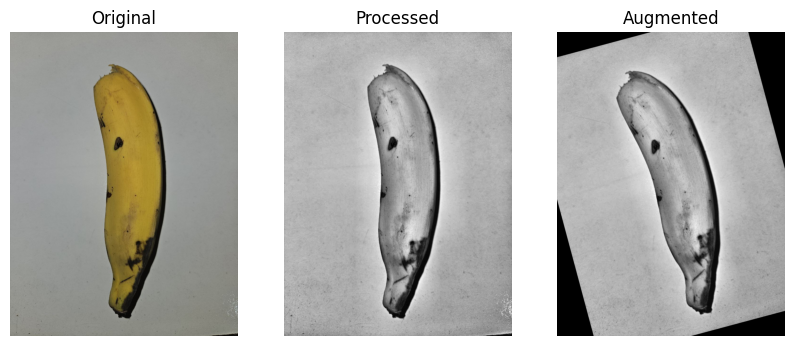

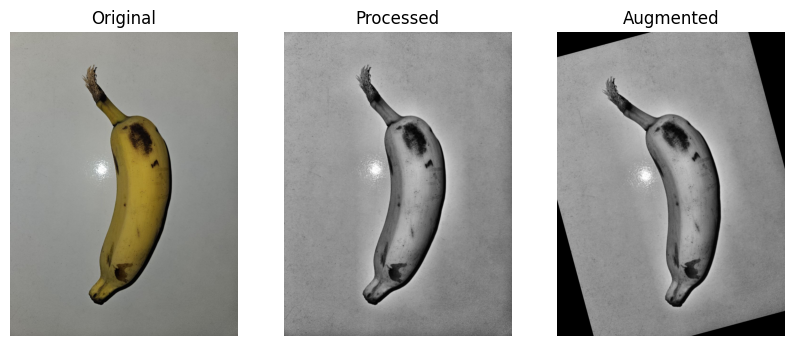

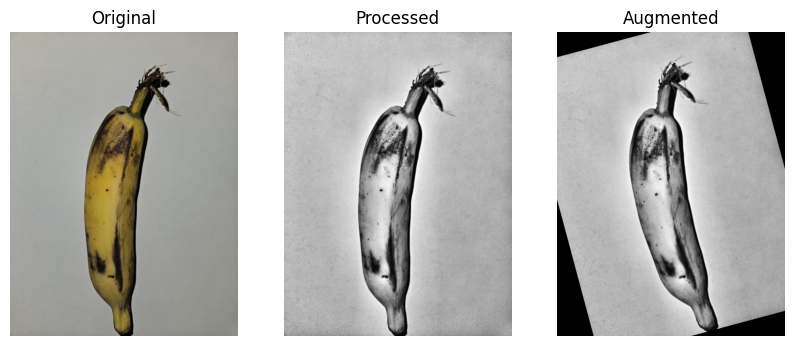

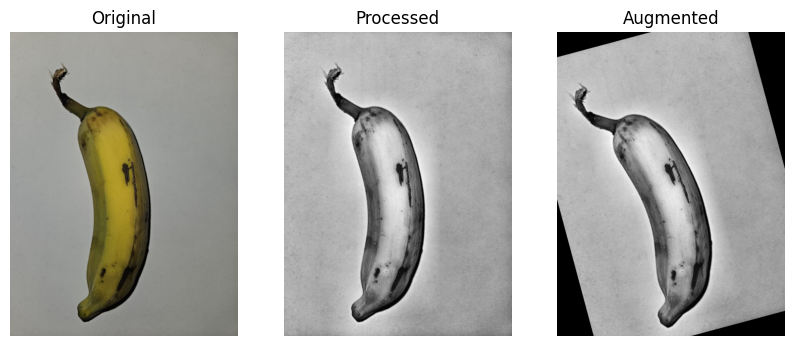

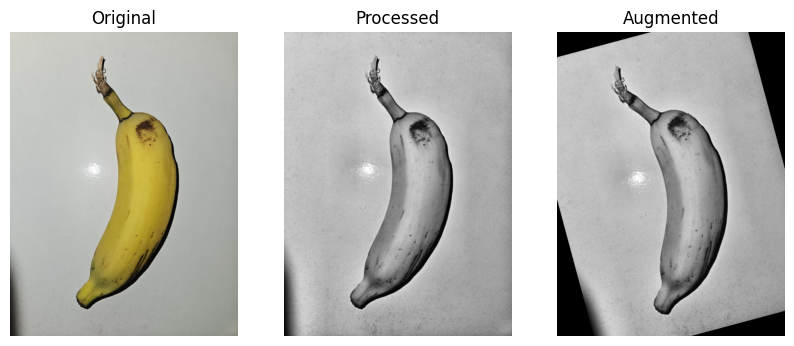

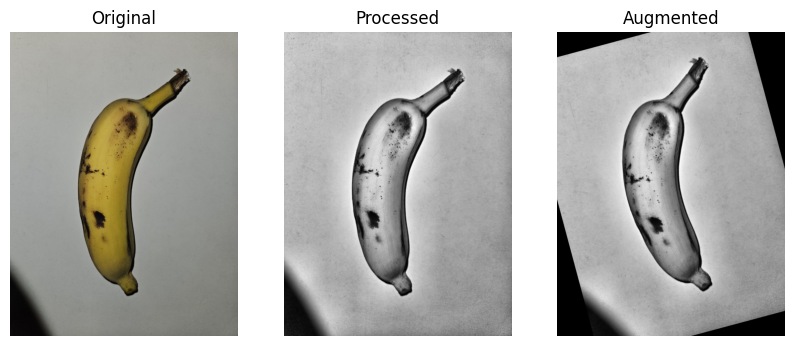

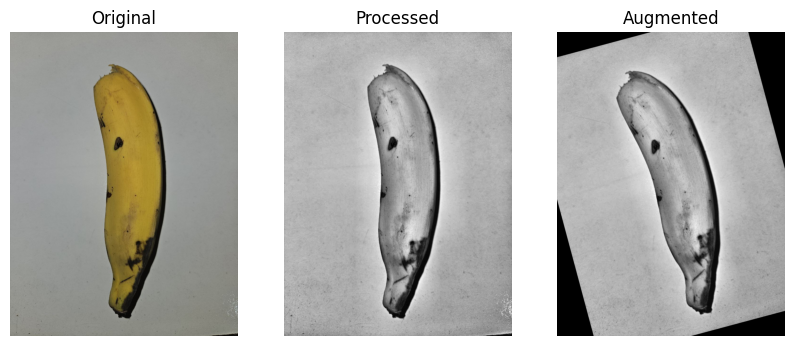

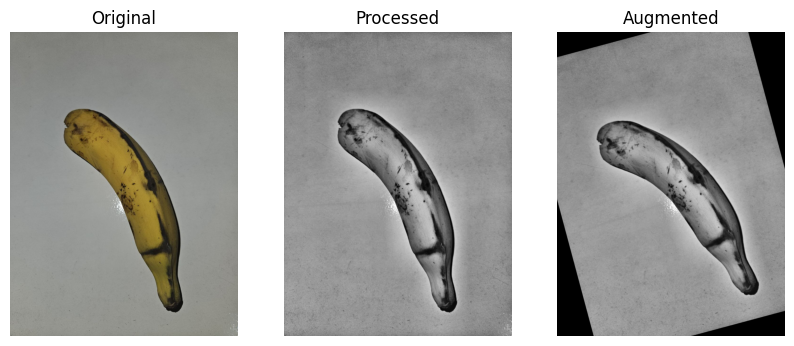

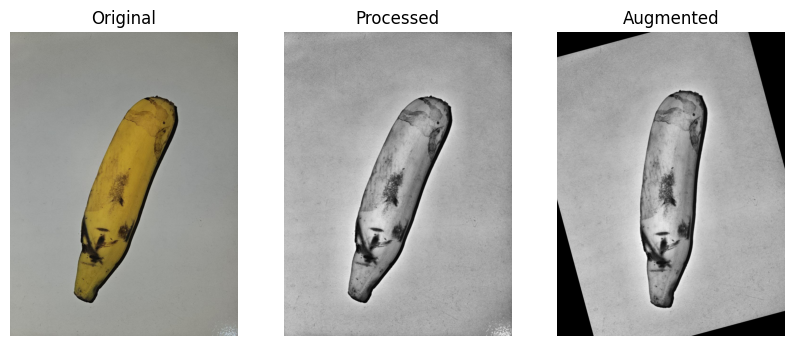

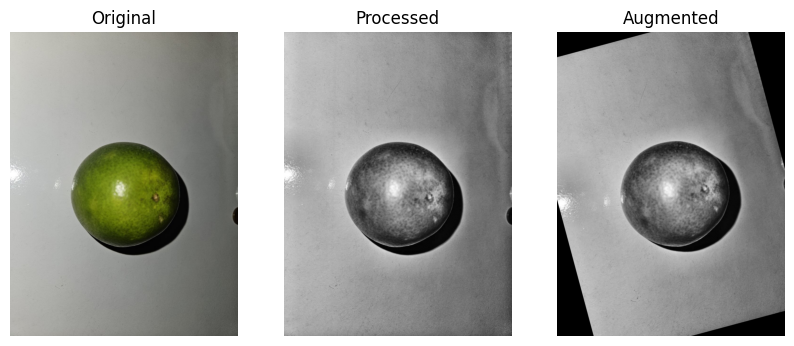

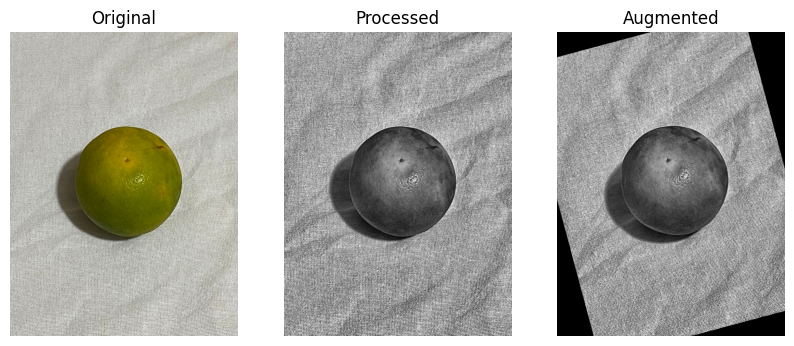

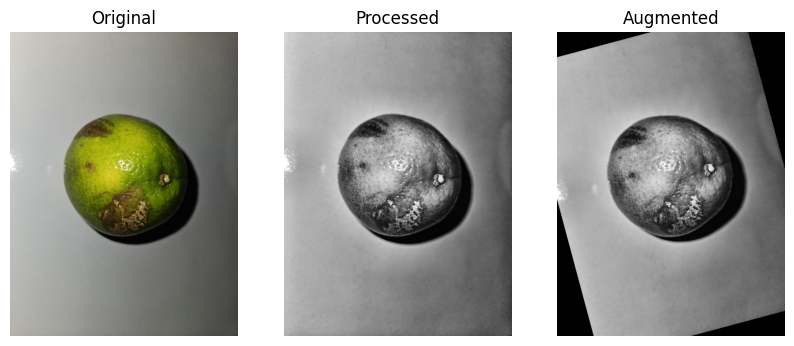

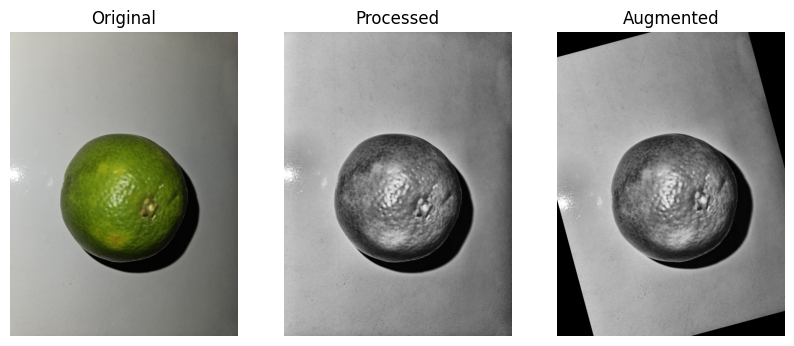

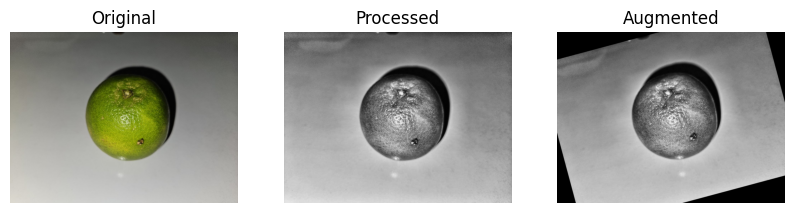

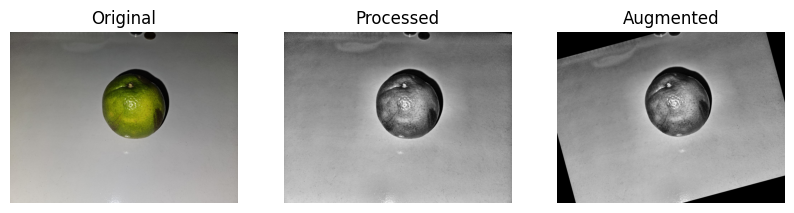

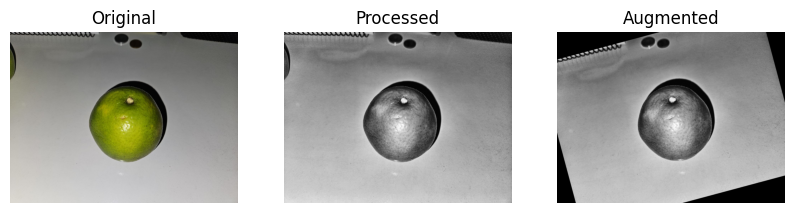

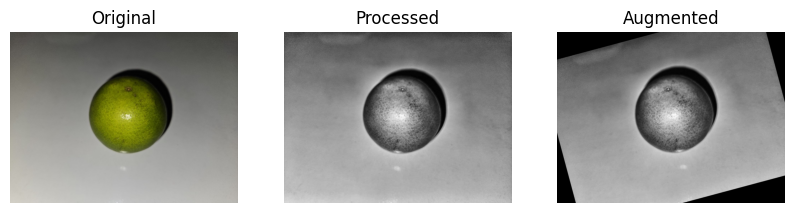

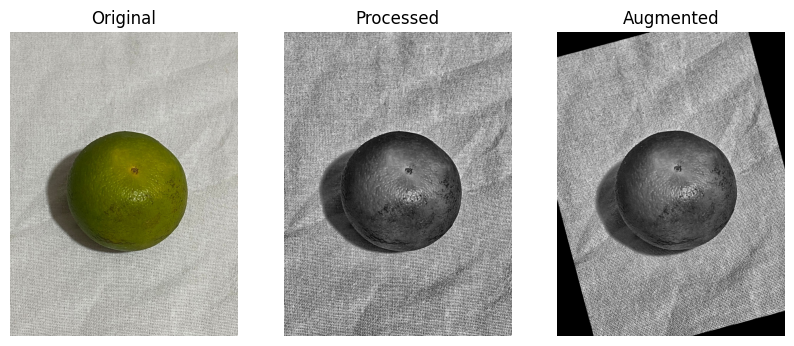

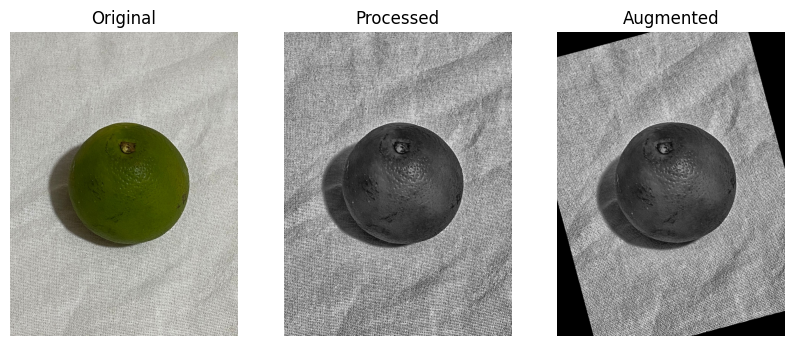

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Caminho base da base de dados
base_path = "./database"
output_path = "./processed_database01"
os.makedirs(output_path, exist_ok=True)

# Funções auxiliares para pré-processamento
def preprocess_image(image):
    """Aplica o pré-processamento básico a uma imagem."""
    # Conversão para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Redução de ruído com filtro Gaussiano
    denoised = cv2.GaussianBlur(gray, (3, 3), 0)

    # Equalização de histograma adaptativa (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized = clahe.apply(denoised)

    return equalized

def augment_image(image):
    """Gera variações da imagem para data augmentation."""
    augmented_images = []
    rows, cols = image.shape

    # Rotação
    for angle in [15, -15]:
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        rotated = cv2.warpAffine(image, M, (cols, rows))
        augmented_images.append(rotated)

    # Flip horizontal
    flipped = cv2.flip(image, 1)
    augmented_images.append(flipped)

    # Ajustes de brilho
    for alpha in [0.8, 1.2]:
        bright = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
        augmented_images.append(bright)

    return augmented_images

# Pré-processamento em lote para cada pasta de objetos
categories = ["maca", "banana", "laranja"]

for category in categories:
    input_folder = os.path.join(base_path, category)
    output_folder = os.path.join(output_path, category)
    os.makedirs(output_folder, exist_ok=True)

    for image_file in sorted(os.listdir(input_folder)):
        if image_file.endswith(".jpg"):
            # Caminho completo da imagem
            image_path = os.path.join(input_folder, image_file)

            # Leitura da imagem
            image = cv2.imread(image_path)

            # Pré-processamento
            processed = preprocess_image(image)

            # Salvar imagem pré-processada
            output_file = os.path.join(output_folder, f"processed_{image_file}")
            cv2.imwrite(output_file, processed)

            # Data augmentation
            augmented_images = augment_image(processed)
            for i, aug_image in enumerate(augmented_images):
                aug_output_file = os.path.join(output_folder, f"aug_{i}_{image_file}")
                cv2.imwrite(aug_output_file, aug_image)

            # Exibir exemplo
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 3, 1)
            plt.title("Original")
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.title("Processed")
            plt.imshow(processed, cmap="gray")
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.title("Augmented")
            plt.imshow(augmented_images[0], cmap="gray")
            plt.axis("off")

            plt.show()
